# Project 3 - Income Qualification:
### DESCRIPTION: Identify the level of income qualification needed for the families in Latin America.
    Identify the output variable.
    Understand the type of data.
    Check if there are any biases in your dataset.
    Check whether all members of the house have the same poverty level.
    Check if there is a house without a family head.
    Set poverty level of the members and the head of the house within a family.
    Count how many null values are existing in columns.
    Remove null value rows of the target variable.
    Predict the accuracy using random forest classifier.
    Check the accuracy using random forest with cross validation.

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv("D:/SimpliLearn-DataScience/2) Post Graduate Program in Data Science/6. PG DS - Machine Learning/Practice & Project/Project 3 - Income Qualification/train.csv")
test_data = pd.read_csv("D:/SimpliLearn-DataScience/2) Post Graduate Program in Data Science/6. PG DS - Machine Learning/Practice & Project/Project 3 - Income Qualification/test.csv")

In [3]:
train_data.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [4]:
test_data.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,0,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,1,0,0,0,0,0,0,0,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,16,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,1,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,17,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,0,1,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,16,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5b598fbc9,0,1,0,1,no,16,no,16.0,0,0,0,0,0,0,0,1,0,1,1.0,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1e2fc704e,1,0,0,1,8,no,11,NaN,0,0,0,0,1,0,0,0,0,2,0.5,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,18,121,324,1,0,1,0.25,64.00,NaN,324


In [5]:
train_data.select_dtypes('object').columns

Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')

In [6]:
for column in train_data.columns:
    if column not in test_data.columns:
        print("Output columns is: {}".format(column))

Output columns is: Target


In [7]:
train_data.Target.value_counts()

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

#### Q1: Identify the output variable.

**Answer:** Target column contains output for dataset and has four levels - 1, 2, 3, 4

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


#### Q2: Understand the type of data.

**Answer:** There are 143 columns in dataset. The last column in dataset 'Target' has output i.e. income level. Remaining 142 columns will input variable for model (some input columns may be dropped during preprocessing/ feature selection).
        
        - 8 columns are float64.
        - 130 columns are int64.
        - 5 columns are object.
        
#### Important columns in dataset
- Id - a unique identifier for each row.
- Target - the target is an ordinal variable indicating groups of income levels.
    - 1 = extreme poverty 2 = moderate poverty 3 = vulnerable households 4 = non vulnerable households
- idhogar - this is a unique identifier for each household. This can be used to create household-wide features, etc. 
- parentesco1 - indicates if this person is the head of the household.

In [9]:
# List the columns for different datatypes:
print('Integer Type: ', list(train_data.select_dtypes(np.int64).columns))
print('Float Type: ', list(train_data.select_dtypes(np.float64).columns))
print('Object Type: ', list(train_data.select_dtypes(np.object).columns))

Integer Type:  ['hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1', 'r4h2', 'r4h3', 'r4m1', 'r4m2', 'r4m3', 'r4t1', 'r4t2', 'r4t3', 'tamhog', 'tamviv', 'escolari', 'hhsize', 'paredblolad', 'paredzocalo', 'paredpreb', 'pareddes', 'paredmad', 'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisocemento', 'pisoother', 'pisonatur', 'pisonotiene', 'pisomadera', 'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 'abastaguadentro', 'abastaguafuera', 'abastaguano', 'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 'sanitario2', 'sanitario3', 'sanitario5', 'sanitario6', 'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3', 'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 'parentesco1

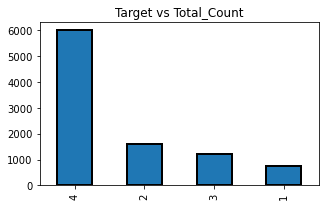

In [10]:
train_data.Target.value_counts().plot.bar(figsize=(5,3), linewidth=2, edgecolor='k', title="Target vs Total_Count");

#### Q3: Check if there are any biases in your dataset.
**Answer:** Data bias in machine learning is a type of error in which certain elements of a dataset are more heavily weighted and/or represented than others. A biased dataset does not accurately represent a model’s use case, resulting in skewed outcomes, low accuracy levels, and analytical errors.

From above plot of values in Target column, we can see that data is little biased.

In [11]:
train_data.nunique()

Id                 9557
v2a1                157
hacdor                2
rooms                11
hacapo                2
v14a                  2
refrig                2
v18q                  2
v18q1                 6
r4h1                  6
r4h2                  9
r4h3                  9
r4m1                  6
r4m2                  7
r4m3                  9
r4t1                  7
r4t2                 11
r4t3                 13
tamhog               13
tamviv               14
escolari             22
rez_esc               6
hhsize               13
paredblolad           2
paredzocalo           2
paredpreb             2
pareddes              2
paredmad              2
paredzinc             2
paredfibras           2
paredother            2
pisomoscer            2
pisocemento           2
pisoother             2
pisonatur             2
pisonotiene           2
pisomadera            2
techozinc             2
techoentrepiso        2
techocane             2
techootro             2
cielorazo       

Column 'idhogar' in dataset contain household level information (household identity). There are 2988 household data in train file.

In [12]:
poverty_variance_within_household = train_data.groupby('idhogar')['Target'].nunique()
print(sum(poverty_variance_within_household>1))
#poverty_variance_within_household[list(poverty_variance_within_household>1)].index

85


In [13]:
# view data of household with different povert level among head/ members
train_data[train_data['idhogar'] == poverty_variance_within_household[
    list(poverty_variance_within_household>1)].index[0]][['idhogar', 'parentesco1', 'Target']]

,idhogar,parentesco1,Target
7651,0172ab1d9,0,3
7652,0172ab1d9,0,2
7653,0172ab1d9,0,3
7654,0172ab1d9,1,3
7655,0172ab1d9,0,2


#### Q4: Check whether all members of the house have the same poverty level.
**Answer:** 85 housesholds out of total 2988 households in dataset have at least one member with income level different than other members of household.

In [14]:
idhogar_missing_head = []
grouped_head_info = train_data.groupby('idhogar')['parentesco1'].sum()

for i in range(len(grouped_head_info)):
    if grouped_head_info[i] == 0:
        idhogar_missing_head.append(grouped_head_info.index[i])  
        
print(len(idhogar_missing_head))
# idhogar_missing_head       

15


#### Q5: Check if there is a house without a family head.
**Answer:** 15 housesholds out of total 2988 households in dataset have no information about family head.

#### In order to set poverty level of the members and the head of the house within a family, first we will do it for households without head (all members should have the same poverty level), then we will set member's poverty level the same as its head's poverty level for those households in which head/ members have different poverty level.

In [15]:
# As found in previous section, 15 housesholds out of total 2988 households in dataset have no information about family head.
for value in idhogar_missing_head:
    k = train_data[train_data['idhogar']==value]['Target'].values
    if np.var(k) !=0:
        print('Members in household {} have different level of poverty'.format(value))

#### 6(i) Members in each of these 15 households have same level of poverty. Now lets check data of households with family head.

In [16]:
for value in list(poverty_variance_within_household[list(poverty_variance_within_household>1)].index):
    # find the poverty level of family head for each household
    head_poverty = int(train_data[(train_data['idhogar']==value) & (train_data['parentesco1']==1)]['Target'].values)
        
    # assign the correct level to each member of household
    train_data.loc[train_data['idhogar'] == value, 'Target'] = head_poverty
    
poverty_variance_within_household = train_data.groupby('idhogar')['Target'].nunique()
print(sum(poverty_variance_within_household>1))

0


#### 6(ii) Now there is no household with head/ members having different poverty level.



#### Q6: Set poverty level of the members and the head of the house {same} within a family.
**Answer:** Done and verified in sr. no. 6(i) and 6(ii) as above.

In [17]:
train_data.isnull().sum()[train_data.isnull().sum()>0]

v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

In [18]:
train_data.isnull().sum().sum()

22140

In [19]:
round(train_data.isnull().sum()[train_data.isnull().sum()>0]/len(train_data)*100,2)

v2a1         71.78
v18q1        76.82
rez_esc      82.95
meaneduc      0.05
SQBmeaned     0.05
dtype: float64

#### Q7: Count how many null values are existing in columns.
**Answer:** Following 5 columns has null values mentioned against each column name:-

    v2a1         6860
    v18q1        7342
    rez_esc      7928
    meaneduc        5
    SQBmeaned       5

Total null values in complete train dataset are: 22140

In [20]:
train_data.Target.isnull().sum()

0

#### Q8: Remove null value rows of the target variable.
**Answer:** Target column does not have any null values.

### Data Preprocessing and Feature Engineering before model building:

In [21]:
sr = train_data.isnull().sum()/len(train_data)*100

In [22]:
sr[sr>0]

v2a1         71.779847
v18q1        76.823271
rez_esc      82.954902
meaneduc      0.052318
SQBmeaned     0.052318
dtype: float64

In [23]:
# lets us drop columns having more than 30% missing values
data1 = train_data.drop(list(sr[sr>30].index), axis=1)

In [24]:
sr1 = data1.isnull().sum()
sr1[sr1>0]

meaneduc     5
SQBmeaned    5
dtype: int64

In [25]:
# we can drop rows having missing values as there are not many rows with missing values.
data1 = data1.dropna()
data1

,Id,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,0,3,0,1,1,0,0,1,1,0,0,0,0,1,1,1,1,10,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.00,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0000,100.0000,1849,4
1,ID_f29eb3ddd,0,4,0,1,1,1,0,1,1,0,0,0,0,1,1,1,1,12,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.00,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0000,144.0000,4489,4
2,ID_68de51c94,0,8,0,1,1,0,0,0,0,0,1,1,0,1,1,1,1,11,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.00,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0000,121.0000,8464,4
3,ID_d671db89c,0,5,0,1,1,1,0,2,2,1,1,2,1,3,4,4,4,9,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.00,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0000,121.0000,289,4
4,ID_d56d6f5f5,0,5,0,1,1,1,0,2,2,1,1,2,1,3,4,4,4,11,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.00,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0000,121.0000,1369,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,ID_d45ae367d,0,6,0,1,1,0,0,2,2,1,2,3,1,4,5,5,5,9,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,d6c086aa3,1,4,0,5,.25,9,no,8.25,0,0,0,1,0,0,0,0,0,4,1.250000,0,0,1,0,0,0,1,1,3,0,0,0,0,0,1,0,1,46,81,2116,25,81,1,1.562500,0.0625,68.0625,2116,2
9553,I

In [26]:
data1.describe(include='all')

,Id,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,9552,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.0,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552,9552.000000,9552.000000,9552.000000,9552.000000,9552,9552,9552,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000
unique,9552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2985,NaN,NaN,NaN,NaN,31,22,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ID_fc6069d5e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fd8a6d014,NaN,NaN,NaN,NaN,yes,no,no,NaN,NaN,NaN,Na

In [27]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9552 entries, 0 to 9556
Columns: 140 entries, Id to Target
dtypes: float64(5), int64(130), object(5)
memory usage: 10.3+ MB


In [28]:
data1.select_dtypes('float64')

,meaneduc,overcrowding,SQBovercrowding,SQBdependency,SQBmeaned
0,10.00,1.000000,1.000000,0.0000,100.0000
1,12.00,1.000000,1.000000,64.0000,144.0000
2,11.00,0.500000,0.250000,64.0000,121.0000
3,11.00,1.333333,1.777778,1.0000,121.0000
4,11.00,1.333333,1.777778,1.0000,121.0000
...,...,...,...,...,...
9552,8.25,1.250000,1.562500,0.0625,68.0625
9553,8.25,1.250000,1.562500,0.0625,68.0625
9554,8.25,1.250000,1.562500,0.0625,68.0625
9555,8.25,1.250000,1.562500,0.0625,68.0625


In [29]:
data1.select_dtypes('int64')

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,hogar_total,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,agesq,Target
0,0,3,0,1,1,0,0,1,1,0,0,0,0,1,1,1,1,10,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1849,4
1,0,4,0,1,1,1,0,1,1,0,0,0,0,1,1,1,1,12,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,4489,4
2,0,8,0,1,1,0,0,0,0,0,1,1,0,1,1,1,1,11,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,8464,4
3,0,5,0,1,1,1,0,2,2,1,1,2,1,3,4,4,4,9,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2,2,0,4,0,0,0,1,0,0,0,0,0,3,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,289,4
4,0,5,0,1,1,1,0,2,2,1,1,2,1,3,4,4,4,11,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,4,0,0,0,0,1,0,0,0,0,3,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1369,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,0,6,0,1,1,0,0,2,2,1,2,3,1,4,5,5,5,9,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,4,0,5,0,0,0,1,0,0,0,0,0,4,0,0,1,0,0,0,1,1,3,0,0,0,0,0,1,0,1,46,81,2116,25,81,1,2116,2
9553,0,6,0,1,1,0,0,2,2,1,2,3,1,4,5,5,5,0,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,4,0,5,1,0,0,0,0,0,0,0,0,4,0,0,1,0,0,0,1,1,3,0,0,0,0,0,1,0,1,2,0,4,25,81,1,4,2
9554,0,6,0,1,1,0,0,2,2,1,2,3,1,4,5,5,5,5,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,4,0,5,0,1,0,0,0,0,0,0,0,4,0,0,1,0,0,0,1,1,3,0,0,0,0,0,1,0,1,50,25,2500,25,81,1,2500,2
9555,0,6,0,1,1,0,0,2,2,1,2,3,1,4,5

In [30]:
data1.select_dtypes('object')

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no
...,...,...,...,...,...
9552,ID_d45ae367d,d6c086aa3,.25,9,no
9553,ID_c94744e07,d6c086aa3,.25,9,no
9554,ID_85fc658f8,d6c086aa3,.25,9,no
9555,ID_ced540c61,d6c086aa3,.25,9,no


### Feature Engineering
There is plenty more exploratory data analysis we can do, but first we should work on consolidating our data at a household level. We already have some of the information for each household, but for training, we will need all of the information summarized for each household. This means grouping the individuals in a house (groupby) and performing an aggregation (agg) of the individual variables.


#### Define Variable Categories in Dataset:
There are different categories of variables/ columns in dataset:

- Squared Variables: derived from squaring variables in the data
- Id variables: identifies the data and should not be used as features
- Household variables
    - Boolean: Yes or No (0 or 1)
    - Ordered Discrete: Integers with an ordering
    - Continuous numeric
- Individual Variables: these are characteristics of each individual rather than the household
    - Boolean: Yes or No (0 or 1)
    - Ordered Discrete: Integers with an ordering

##### (1) Squared Variables
First we will check correlation of the squared variables with their non-squared version of variables. Sometimes variables are squared or transformed as part of feature engineering because it can help linear models learn relationships that are non-linear. However, since we will be using more complex model, these squared features are superfluous. So we will drop highly correlated squared version of variables otherwise it will slowdown model training.

In [31]:
sqr_var = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 
           'SQBmeaned', 'agesq']

In [32]:
sum(data1['SQBage'] == data1['agesq'])==len(data1)

True

'SQBage' and 'agesq' contains exactly the same data so we can drop any one of them.

In [33]:
sqr_var = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 
           'SQBmeaned']

Now let us check correlation between squared variables and original variables

In [34]:
nonsqr_var = ['escolari', 'age', 'hogar_total', 'edjefe', 'hogar_nin', 'overcrowding', 'dependency', 'meaneduc']

In [35]:
for i in range(len(sqr_var)):
    print(data1[[sqr_var[i], nonsqr_var[i]]].corr(),"\n")

             SQBescolari  escolari
SQBescolari     1.000000  0.943317
escolari        0.943317  1.000000 

          SQBage       age
SQBage  1.000000  0.958078
age     0.958078  1.000000 

                SQBhogar_total  hogar_total
SQBhogar_total        1.000000     0.950192
hogar_total           0.950192     1.000000 

           SQBedjefe
SQBedjefe        1.0 

              SQBhogar_nin  hogar_nin
SQBhogar_nin      1.000000   0.884172
hogar_nin         0.884172   1.000000 

                 SQBovercrowding  overcrowding
SQBovercrowding         1.000000      0.945136
overcrowding            0.945136      1.000000 

               SQBdependency
SQBdependency            1.0 

           SQBmeaned  meaneduc
SQBmeaned   1.000000  0.948003
meaneduc    0.948003  1.000000 



Since these squared variables are highly correlated with their corresponding original variables. lets drop these variables.

In [36]:
data1.drop(sqr_var,axis=1, inplace=True)

In [37]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9552 entries, 0 to 9556
Columns: 132 entries, Id to Target
dtypes: float64(2), int64(125), object(5)
memory usage: 9.7+ MB


#### (2) Id Variables:
These variables will be kept in the data as we would need them for identification later

In [38]:
id_var = ['Id', 'idhogar', 'Target']

#### (3) Household Variables:

In [39]:
# 2 columns under household categories already dropped since these columns has more more than 30% null values.

hh_var_boo = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 'paredpreb','pisocemento', 'pareddes', 
              'paredmad','paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother', 'pisonatur', 'pisonotiene', 
              'pisomadera', 'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 'abastaguadentro', 
              'abastaguafuera', 'abastaguano', 'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 'sanitario2', 
              'sanitario3', 'sanitario5',   'sanitario6', 'energcocinar1', 'energcocinar2', 'energcocinar3', 
              'energcocinar4', 'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 'elimbasu5', 'elimbasu6', 'epared1', 
              'epared2', 'epared3', 'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 'tipovivi1', 'tipovivi2', 
              'tipovivi3', 'tipovivi4', 'tipovivi5', 'computer', 'television', 'lugar1', 'lugar2', 'lugar3', 'lugar4', 
              'lugar5', 'lugar6', 'area1', 'area2']

# hh_var_ordered = ['rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 'r4t3', 'v18q1', 'tamhog',
#                   'tamviv','hhsize','hogar_nin', 'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone']
hh_var_ordered = ['rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 'r4t3', 'tamhog',
                  'tamviv','hhsize','hogar_nin', 'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone']

# hh_var_cont = ['v2a1', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']
hh_var_cont = ['dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']

In [40]:
head = data1.loc[data1['parentesco1'] == 1, :]
head = head[id_var + hh_var_boo + hh_var_cont + hh_var_ordered]
head.shape

(2970, 96)

##### Highly Correlated Household Variables
Let's take a look at the correlations between all of the household variables. If there are any that are too highly correlated, then we will drop one of the pair of highly correlated variables.

The following code identifies any variables with a greater than 0.95 correlation.

In [41]:
# Create correlation matrix
corr_matrix = head.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop

['coopele', 'area2', 'tamhog', 'hhsize', 'hogar_total']

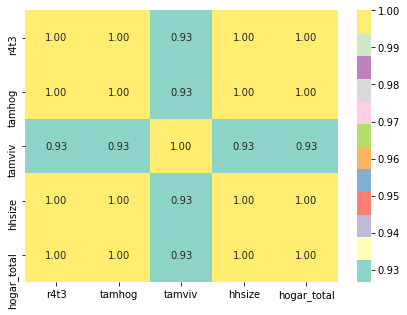

In [42]:
# Lets plot the correlation
plt.figure(figsize=(7,5))
sns.heatmap(corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9],
            annot=True, cmap = plt.cm.Set3, fmt='.2f');

In [43]:
# Lets drop one from each pair of variables which are all highly correlated with one another.
data1 = data1.drop(to_drop, axis= 1)

#### (4) Individual Level Variables
There are two types of individual level variables: Boolean (1 or 0 for True or False) and ordinal (discrete values with a meaningful ordering).

In [44]:
# WE have already dropped column 'rez_esc' from dataset because it had more than 30% null values.

ind_var_boo = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 'estadocivil4', 
               'estadocivil5', 'estadocivil6', 'estadocivil7', 'parentesco1', 'parentesco2',  'parentesco3', 
               'parentesco4', 'parentesco5', 'parentesco6', 'parentesco7', 'parentesco8', 'parentesco9', 'parentesco10', 
               'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 'instlevel4', 'instlevel5', 
               'instlevel6', 'instlevel7', 'instlevel8', 'instlevel9', 'mobilephone']

# ind_var_ordered = ['rez_esc', 'escolari', 'age']
ind_var_ordered = ['escolari', 'age']

ind = data1[id_var + ind_var_boo + ind_var_ordered]
ind.shape

(9552, 38)

#### Highly Correlaetd Individual Variables
We can do the same process we did with the household level variables to identify any redundant individual variables. We'll focus on any variables that have an absolute magnitude of the correlation coefficient greater than 0.95.

In [45]:
#Create correlation matrix
corr_matrix = ind.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop

['female']

In [46]:
# 'Female' is simply the opposite of 'male'. Let's drop one of these two.
data1 = data1.drop('male', axis = 1)

Now let us check all 'object' type columns one by one

In [47]:
data1.select_dtypes('object')

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no
...,...,...,...,...,...
9552,ID_d45ae367d,d6c086aa3,.25,9,no
9553,ID_c94744e07,d6c086aa3,.25,9,no
9554,ID_85fc658f8,d6c086aa3,.25,9,no
9555,ID_ced540c61,d6c086aa3,.25,9,no


Id - Not needed, since it is not useful in model building

idhogar - Not needed, since house level won't help in predicting anything.

In [48]:
data1 = data1.drop(['Id', 'idhogar'], axis=1)
data1.shape

(9552, 124)

Now 3 columns are left with mixed (string and float/ integer) values:
- dependency - Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)
- edjefe - years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
- edjefa - years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0

In [49]:
# Custom function to convert object variables into numerical data.

def num_map(i):
    
    if i=='yes':
        return(float(1))
    elif i=='no':
        return(float(0))
    else:
        return(float(i))

In [50]:
data1['dependency']=data1['dependency'].apply(num_map)
data1['edjefe']=data1['edjefe'].apply(num_map)
data1['edjefa']=data1['edjefa'].apply(num_map)

In [51]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9552 entries, 0 to 9556
Columns: 124 entries, hacdor to Target
dtypes: float64(5), int64(119)
memory usage: 9.1 MB


In [52]:
X = data1.drop('Target', axis=1)
X

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamviv,escolari,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,age,agesq
0,0,3,0,1,1,0,0,1,1,0,0,0,0,1,1,1,10,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.00,10.0,0.0,10.00,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,43,1849
1,0,4,0,1,1,1,0,1,1,0,0,0,0,1,1,1,12,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8.00,12.0,0.0,12.00,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,67,4489
2,0,8,0,1,1,0,0,0,0,0,1,1,0,1,1,1,11,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8.00,0.0,11.0,11.00,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,92,8464
3,0,5,0,1,1,1,0,2,2,1,1,2,1,3,4,4,9,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2,2,0,1.00,11.0,0.0,11.00,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,17,289
4,0,5,0,1,1,1,0,2,2,1,1,2,1,3,4,4,11,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,1.00,11.0,0.0,11.00,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,37,1369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,0,6,0,1,1,0,0,2,2,1,2,3,1,4,5,5,9,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0.25,9.0,0.0,8.25,0,0,0,1,0,0,0,0,0,4,1.250000,0,0,1,0,0,0,1,1,3,0,0,0,0,0,1,0,46,2116
9553,0,6,0,1,1,0,0,2,2,1,2,3,1,4,5,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,4,0,0.25,9.0,0.0,8.25,1,0,0,0,0,0,0,0,0,4,1.250000,0,0,1,0,0,0,1,1,3,0,0,0,0,0,1,0,2,4
9554,0,6,0,1,1,0,0,2,2,1,2,3,1,4,5,5,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,4,0,0.25,9.0,0.0,8.25,0,1,0,0,0,0,0,0,0,4,1.250000,0,0,1,0,0,0,1,1,3,0,0,0,0,0,1,0,50,2500
9555,0,6,0,1,1,0,0,2,2,1,2,3,1,4,5,5,11,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0

In [53]:
y = data1['Target']
y

0       4
1       4
2       4
3       4
4       4
       ..
9552    2
9553    2
9554    2
9555    2
9556    2
Name: Target, Length: 9552, dtype: int64

### Creating Machine Learning model with Random Forest Classifier:

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7164, 123) (2388, 123) (7164,) (2388,)


In [56]:
RFC = RandomForestClassifier()

In [57]:
RFC.fit(X_train, y_train)

RandomForestClassifier()

In [58]:
y_predict = RFC.predict(X_test)

In [59]:
RFC.score(X_train, y_train)   # testing accuracy on train data

1.0

In [60]:
RFC.score(X_test, y_test)   # testing accuracy on test data

0.9267169179229481

In [61]:
accuracy_score(y_test,y_predict)

0.9267169179229481

In [62]:
print(confusion_matrix(y_test,y_predict))

[[ 160    4    1   27]
 [   2  335    1   52]
 [   4    3  206   76]
 [   0    5    0 1512]]


In [63]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.96      0.83      0.89       192
           2       0.97      0.86      0.91       390
           3       0.99      0.71      0.83       289
           4       0.91      1.00      0.95      1517

    accuracy                           0.93      2388
   macro avg       0.96      0.85      0.90      2388
weighted avg       0.93      0.93      0.92      2388



#### Improving model performance using GridSearchCV:

In [64]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10,25,50,100],
    'max_depth': [None,1,5,10],
    'min_samples_leaf': [1,3,5]
}

In [65]:
gs = GridSearchCV(estimator=RFC, param_grid=param_grid, cv=3, verbose=1)

In [66]:
gs.fit(X,y)
#gs.fit(X_train,y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 1, 5, 10],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [10, 25, 50, 100]},
             verbose=1)

In [67]:
gs.best_params_

{'max_depth': 1, 'min_samples_leaf': 1, 'n_estimators': 10}

In [68]:
gs.best_score_

0.628036013400335

In [69]:
gs_predictions = gs.predict(X_test)

In [70]:
from sklearn.metrics import accuracy_score
print('Accuracy Score:', accuracy_score(y_test,gs_predictions))

Accuracy Score: 0.6352596314907872


In [71]:
RFC.fit(X_train, y_train)

RandomForestClassifier()

In [72]:
RFC.feature_importances_

array([2.89557656e-03, 2.49236378e-02, 1.52018160e-03, 8.15530406e-04,
       4.64090886e-03, 1.29862250e-02, 1.33824915e-02, 1.91294727e-02,
       1.90855277e-02, 1.55539702e-02, 1.54402260e-02, 2.01423616e-02,
       2.11336882e-02, 2.08029037e-02, 1.89784321e-02, 1.91747766e-02,
       2.06843444e-02, 1.40096044e-02, 6.23387341e-03, 8.88973248e-03,
       7.57684287e-04, 7.06515200e-03, 7.25500803e-04, 8.39874844e-05,
       2.00458554e-04, 1.31749324e-02, 7.95515285e-03, 5.94757269e-06,
       8.88464018e-05, 1.12899251e-03, 4.57673860e-03, 1.65442194e-03,
       1.37455163e-03, 3.29513759e-04, 1.47353664e-05, 1.55468311e-02,
       2.59677466e-03, 2.45769809e-03, 4.40657959e-04, 5.83788467e-03,
       7.13093955e-05, 1.59024421e-04, 3.68734223e-04, 6.85091773e-03,
       6.91465260e-03, 1.61462594e-03, 2.78275635e-04, 3.26880637e-04,
       9.51699700e-03, 9.71950919e-03, 5.55104037e-03, 6.24984340e-03,
       2.28852096e-03, 5.52456210e-03, 3.49629027e-04, 0.00000000e+00,
      

In [73]:
X_train.columns

Index(['hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1', 'r4h2',
       'r4h3', 'r4m1',
       ...
       'qmobilephone', 'lugar1', 'lugar2', 'lugar3', 'lugar4', 'lugar5',
       'lugar6', 'area1', 'age', 'agesq'],
      dtype='object', length=123)

In [74]:
labels = list(X_train)
feature_importances = pd.DataFrame({'feature': labels, 'importance': RFC.feature_importances_})
feature_importances=feature_importances[feature_importances.importance>0.015]
feature_importances.head()

,feature,importance
1,rooms,0.024924
7,r4h2,0.019129
8,r4h3,0.019086
9,r4m1,0.015554
10,r4m2,0.015440


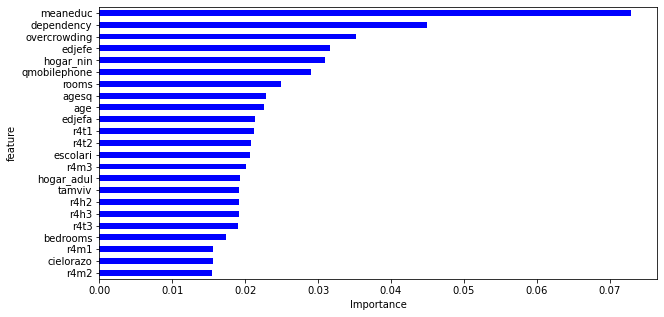

In [75]:
feature_importances.sort_values(by=['importance'], ascending=True, inplace=True)
feature_importances['positive'] = feature_importances['importance'] > 0
feature_importances.set_index('feature',inplace=True)
feature_importances.head()

feature_importances.importance.plot(kind='barh', figsize=(10, 5),color = feature_importances.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance');

#### From the above plot we can observe that meaneduc, dependency and overcrowding has significant influence on the model.